In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/raw/Base.csv')

df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['email_is_free'] = df['email_is_free'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['phone_home_valid'] = df['phone_home_valid'].astype('category')
df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('category')
df['has_other_cards'] = df['has_other_cards'].astype('category')
df['foreign_request'] = df['foreign_request'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int64   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  category
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

In [4]:
print(df.describe(include='all'))

        fraud_bool          income  name_email_similarity  \
count    1000000.0  1000000.000000         1000000.000000   
unique         2.0             NaN                    NaN   
top            0.0             NaN                    NaN   
freq      988971.0             NaN                    NaN   
mean           NaN        0.562696               0.493694   
std            NaN        0.290343               0.289125   
min            NaN        0.100000               0.000001   
25%            NaN        0.300000               0.225216   
50%            NaN        0.600000               0.492153   
75%            NaN        0.800000               0.755567   
max            NaN        0.900000               0.999999   

        prev_address_months_count  current_address_months_count  \
count              1000000.000000                1000000.000000   
unique                        NaN                           NaN   
top                           NaN                           NaN   

## General data distribution (For numerical variables)

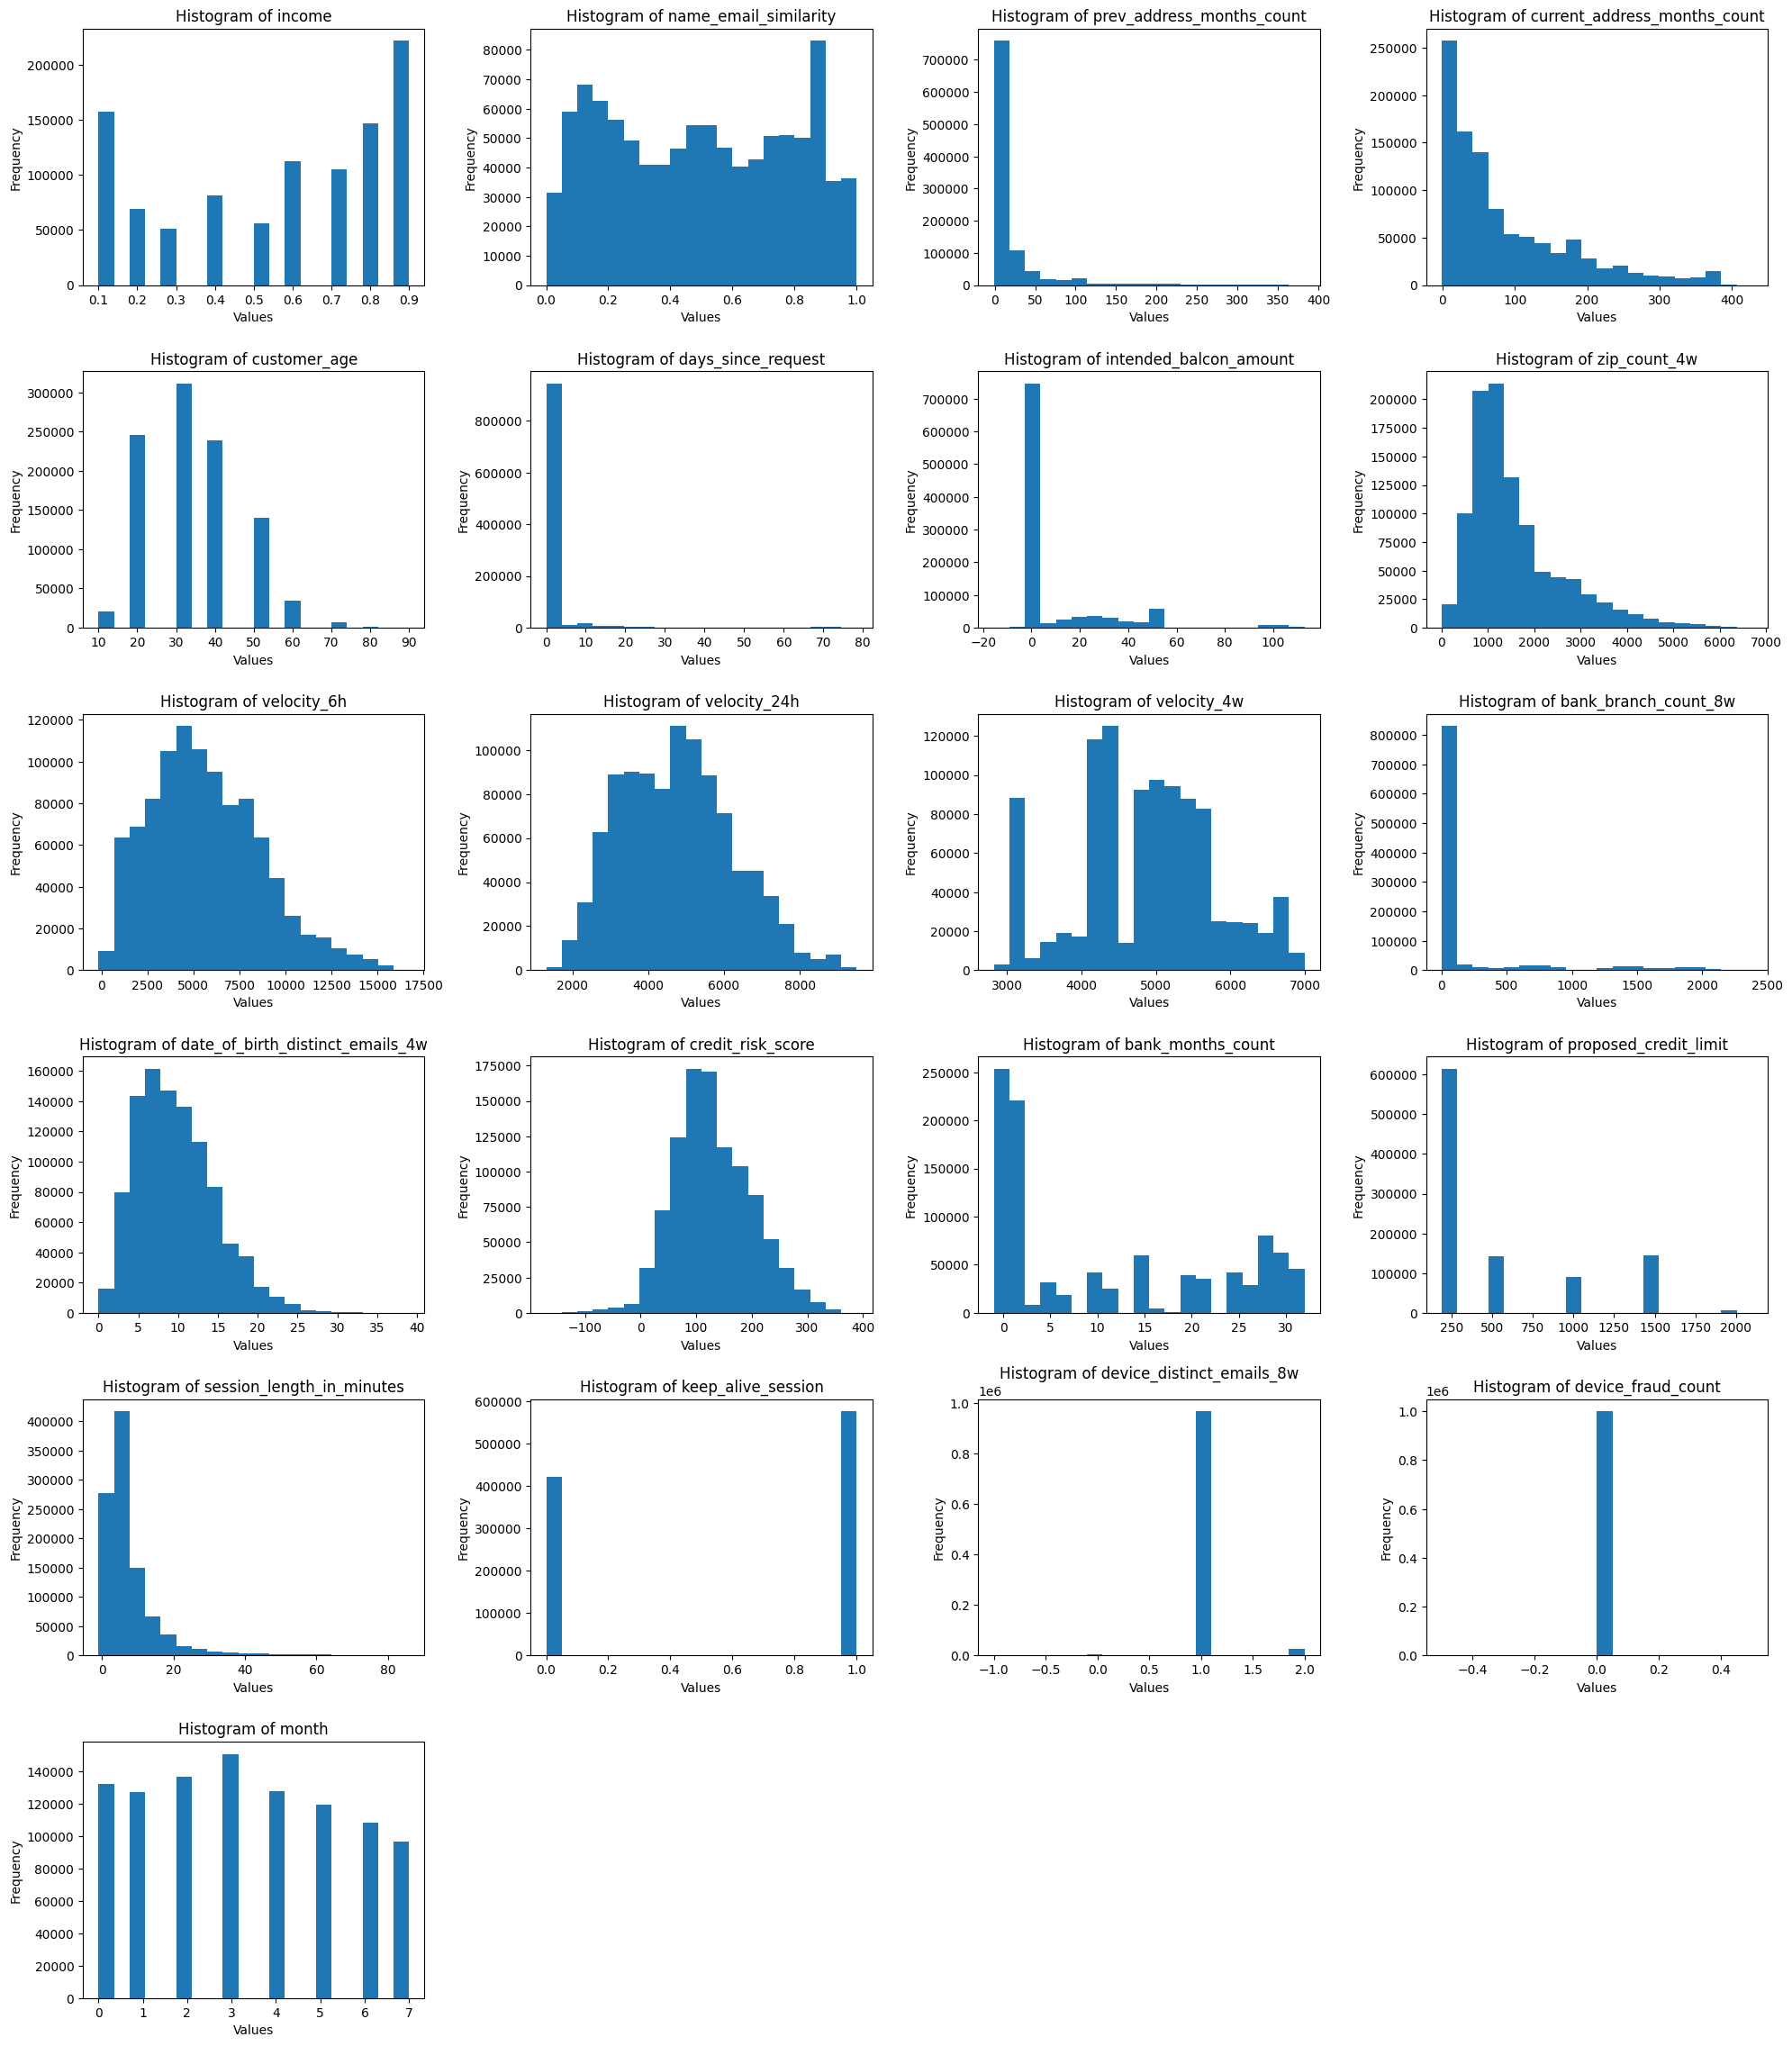

In [5]:
non_categorical_df = df.select_dtypes(exclude=['category'])

num_cols = len(non_categorical_df.columns)
num_rows = 8  # Number of rows in the grid
num_cols_per_row = 4  # Number of columns per row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 30))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each column and plot its histogram on a separate subplot
for i, column_name in enumerate(non_categorical_df.columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    non_categorical_df[column_name].plot(kind='hist', ax=axes[i], bins=20)
    axes[i].set_title('Histogram of {}'.format(column_name))
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_cols, num_rows * num_cols_per_row):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()

## Label-wise data distribution (For numerical variables)

In [8]:
categorical_df = df.select_dtypes(include=['category'])

non_categorical_label_df = non_categorical_df
non_categorical_label_df['fraud_bool'] = df['fraud_bool']

non_categorical_fraud = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 1]
non_categorical_real = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 0]

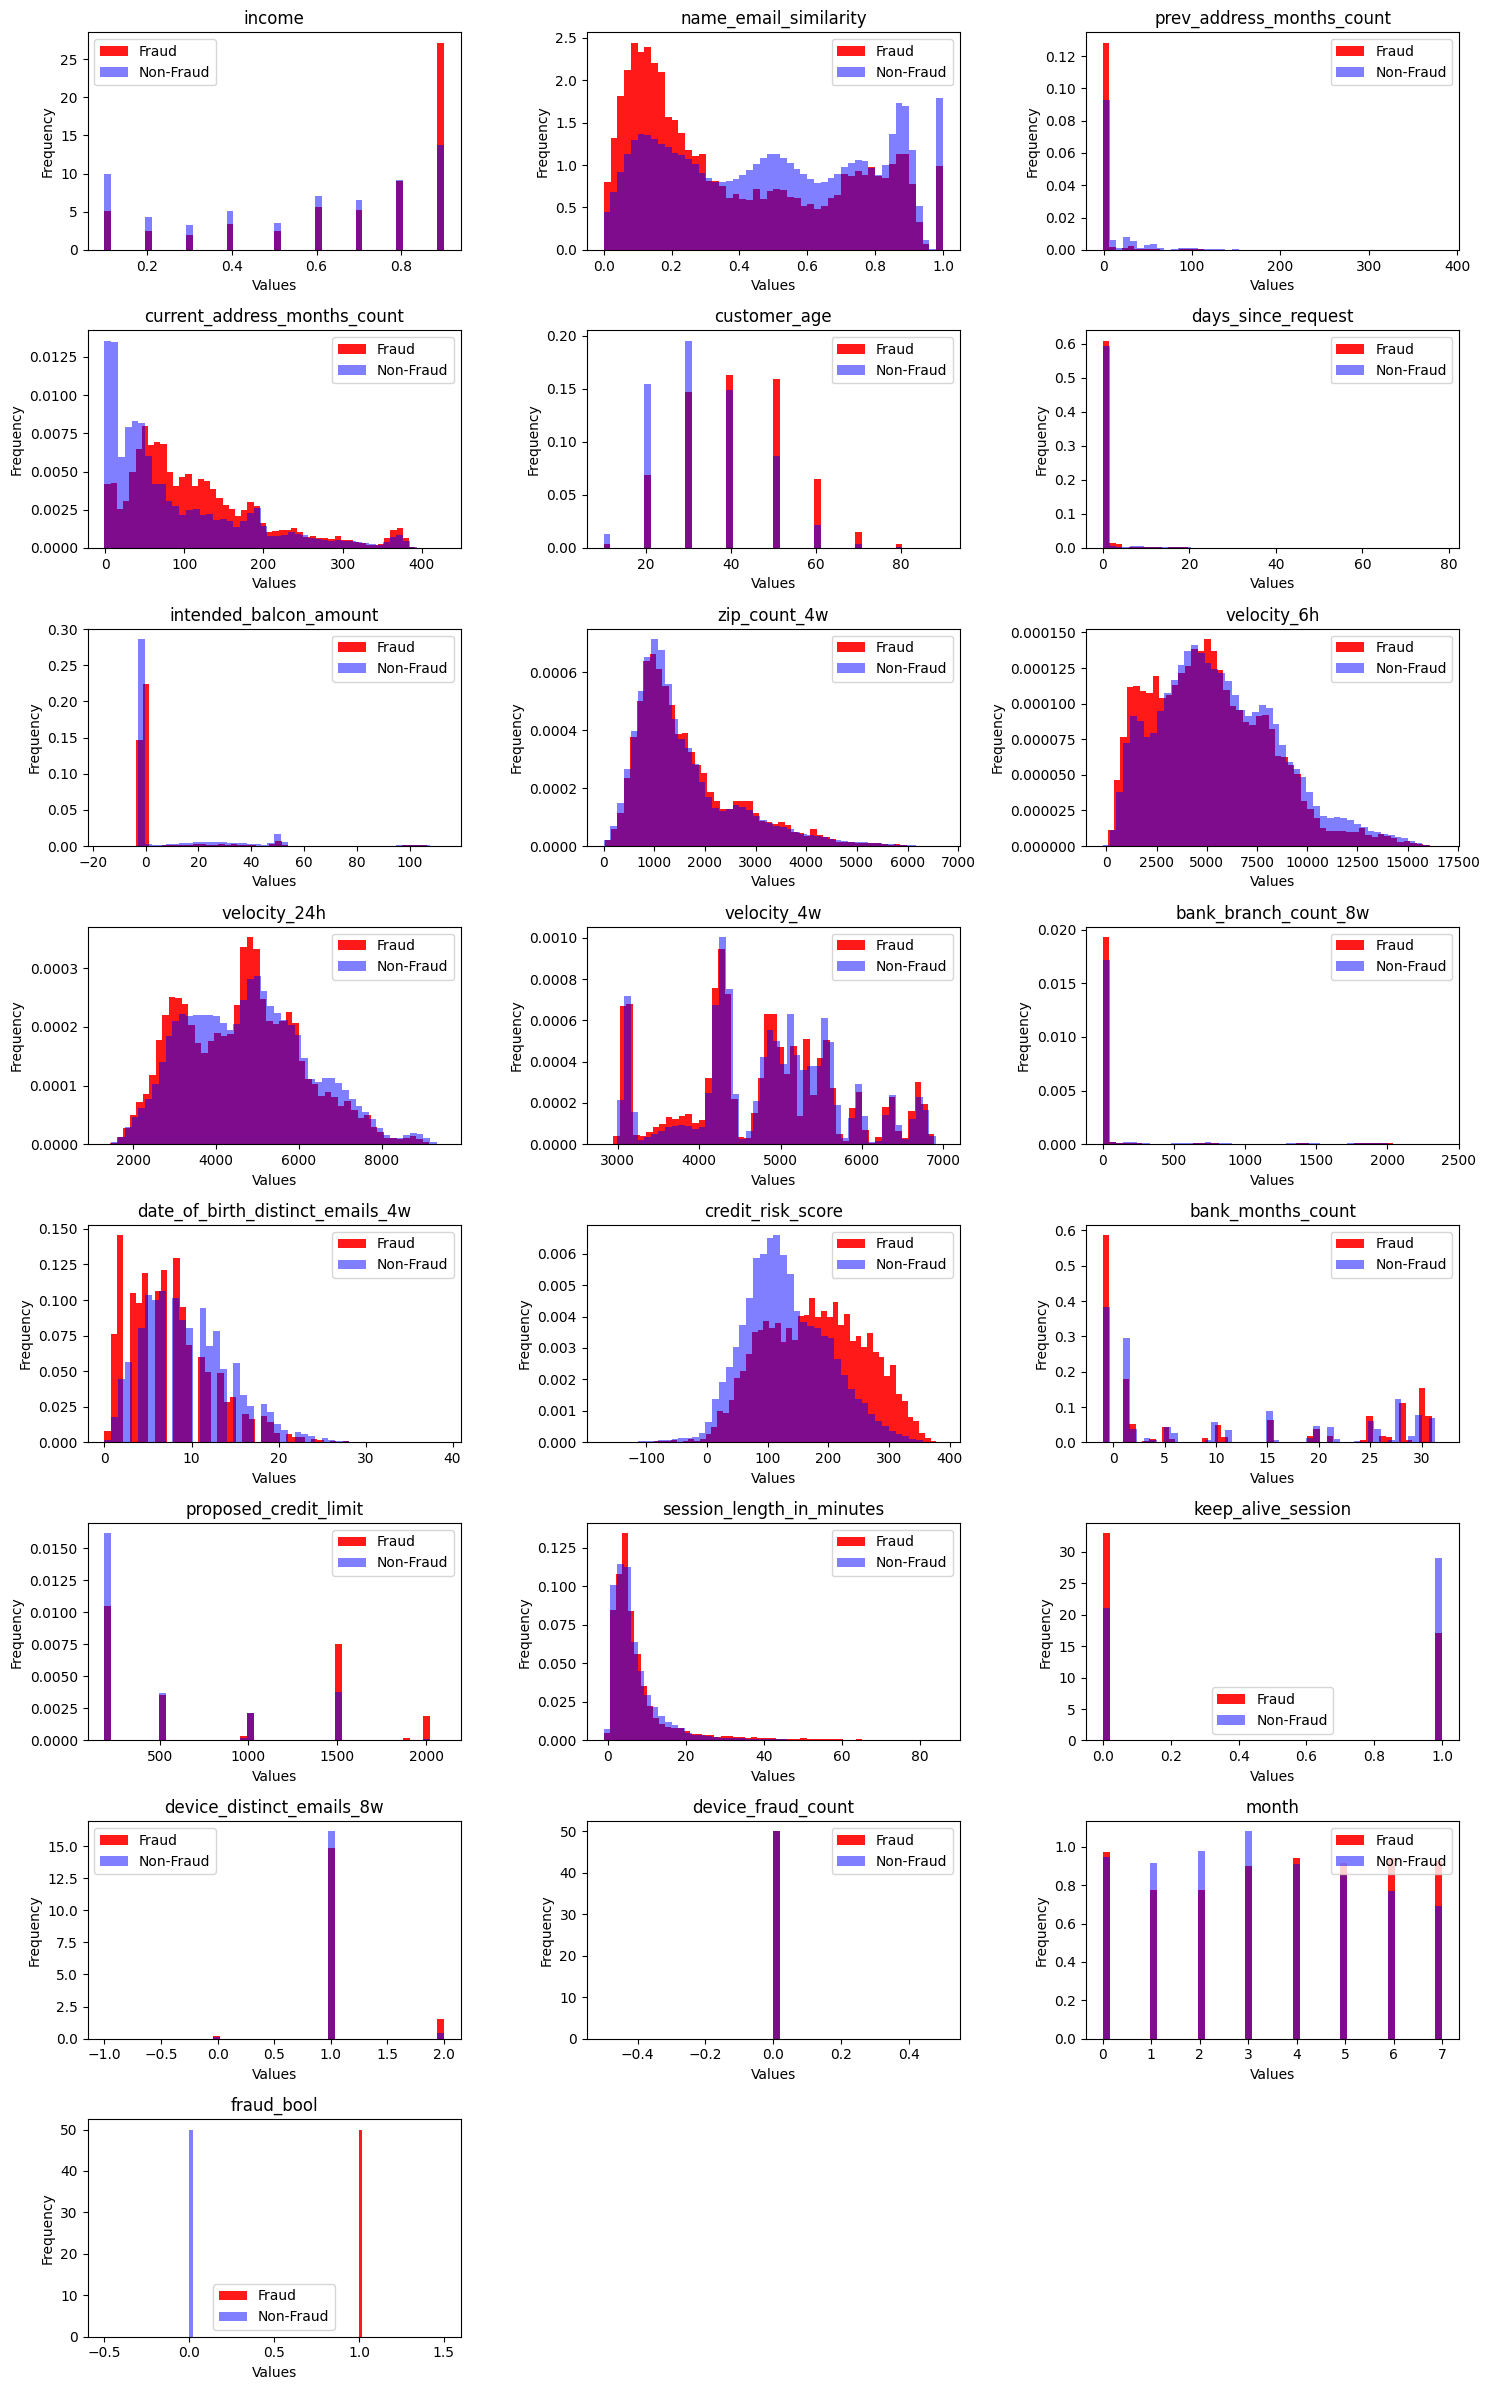

In [7]:
num_columns = len(non_categorical_fraud.columns)
num_columns = len(non_categorical_fraud.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 3*num_rows))

for i, column in enumerate(non_categorical_fraud.columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    
    # Plot histogram for fraud data
    ax.hist(non_categorical_fraud[column], bins=50, alpha=0.9, label='Fraud', color='red', density=True)
    
    # Plot histogram for non-fraud data
    ax.hist(non_categorical_real[column], bins=50, alpha=0.5, label='Non-Fraud', color='blue', density=True)
    
    # Set title and labels
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Add legend
    ax.legend()

# Remove any unused subplots
for i in range(num_columns, num_rows*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()